<a href="https://colab.research.google.com/github/suchirasuresh/Applied-Data-Science-in-Medicine-Psychology-ads_assignment_1--suchira_suresh-/blob/main/08_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fill in your github username and idm credentials below:

In [ ]:
github_username = "suchirasuresh"
idm_credentials = "yh07ajaw"

---

# **Applied Data Science in Medicine & Psychology - Assignment 8**
## Statistics
---
**Deadline: 04.07.2023, 23:59**
### **General setup and submission**
1. Save an editable copy of this notebook to your Google Drive ``File`` $\rightarrow$ ``Save a copy in Drive`` and remove the automatically appended "Copy of" text. **Do not change the file name**.
2. Work on the assignment in the *copied* version of the notebook. Make sure that you **replace** all parts of the tasks indicated with *YOUR CODE HERE* and **raise NotImplementedError()** (otherwise this causes an error in your implementation) or *YOUR ANSWER HERE* with your solution.
3. If you take a break during the implementation, you can save the current status of your work in your repository following the submission instructions below. When you continue working on the assignment, do this in the version of the notebook that you saved in your Google Drive (access from your Google Colab account) or your repository.
4. After finishing the assignment submit your assignment as follows:
    * Check that everything runs as expected. To do that select in the menubar ``Runtime`` $\rightarrow$ ``Restart and run all``. This will clear all your local variables and runs your notebook from the beginning
    * Save your notebook, click ``File`` $\rightarrow$ ``Save``
    * Click ``File`` $\rightarrow$ ``Save a copy in GitHub``
    * Select ``digikolleg-data-science-psychology/08_statistics-<username>`` from the Repository drop-down menu
    * Type ``08_statistics.ipynb`` into the File path text box
    * Optionally, you may enter a description into the "Commit message" text box (like: "solved task 1" or "ready for grading")
    * Make sure that the "Include a link to Colaboratory" box is checked
    * Press "Ok"
    * A new tab or window should open up, displaying your submitted notebook within your GitHub repository

Before the assignment deadline, you can re-submit your assignment as often as you would like. This will update the copy of your assignment file in your assignment's repository.

### **Assignment Description**
In this assignment, you will dive into the world of statistics using Python libraries. You will learn to generate distributions, correct outliers, and perform different types of statistical analyses on two datasets.

#### **Assignment goals**
You are going to learn the following things in this assignment:
1. how to create distributions with different parameters
2. how to perform one way of outlier correction
3. how to perform preparatory analysis using a library
4. how to perform statistical analysis using a library

#### **Assignment point value**
This assignment is worth a total (up to) **11** points. If your code passes all of the manual and automatic tests you will receive full credit.

### **Tasks**
Make sure that you now work on your *copied* version of this assignment's notebook.

#### 0. Imports and Setup
Please **run** the cell below to import the libraries needed for this assignment.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
!pip install biopsykit
import biopsykit as bp
from scipy import stats
!pip install pingouin
import pingouin as pg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.9/279.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=c57d512e7de3355b9962df065aeac4aae3f94ddea4a7e62dae4fa09f76809fc6
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=07f1bdfd91a27909e14ce40a5847a2b612eb3ba8397ba04cecf9bc151dfc0679
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf

#### 1. Introductory Task
In this task, we will create a bimodal distribution from two Gaussian distributions and implement one possible way of outlier correction.

##### 1.1 Create a bimodal distribution ``data`` with 20000 samples. To do so:
* Create a Gaussian distribution ``data_1`` with mean: 17, standard deviation: 5, and 10000 samples
* Create a Gaussian distribution ``data_2`` with mean: 28, standard deviation: 3, and 10000 samples
* Concatenate ``data_1`` and ``data_2`` to ``data`` and convert ``data`` to type int

**Hint**: Check out if [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) can help you to solve the task.

In [2]:
np.random.seed(0) # do not delete: makes random numbers predictable

# data_1 with mean=17, std=5, and 10,000 samples
data_1 = np.random.normal(loc=17, scale=5, size=10000)

# data_2 with mean=28, std=3, and 10,000 samples
data_2 = np.random.normal(loc=28, scale=3, size=10000)

# Concatenate data_1 and data_2
data = np.concatenate((data_1, data_2))

# Convert data to integer type
data = data.astype(int)


In [3]:
# run tests to check your implementation
assert np.shape(data_1) == (10000,) and np.shape(data_2) == (10000,) and np.shape(data) == (20000,), "Check the shapes of data_1, data_2, and data"
assert data.dtype == int, "Check if you converted the values to type int"
assert np.mean(data_1) > 16.5 and np.mean(data_1) < 17.5 and np.std(data_1) > 4.5 and np.std(data_1) < 5.5, "Check mean and standard deviation of data_1"
assert np.mean(data_2) > 27.5 and np.mean(data_2) < 28.5 and np.std(data_2) > 2.5 and np.std(data_2) < 3.5, "Check mean and standard deviation of data_2"

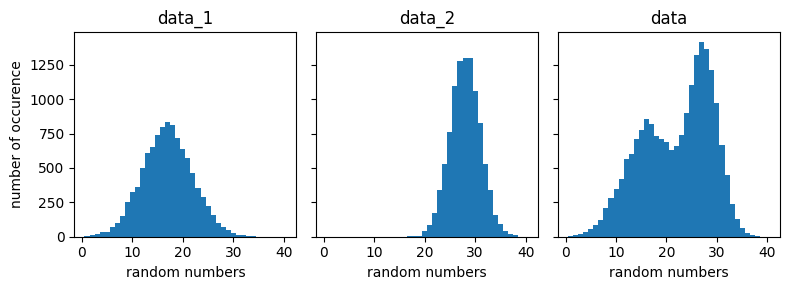

In [4]:
# run cell to visualize data
bins = np.arange(start=0.5, stop=41.5, step=1).tolist()
fig, axs = plt.subplots(ncols=3, figsize=(8, 3), sharey=True, sharex=True)
_ = axs[0].hist(data_1, bins=bins)
_ = axs[1].hist(data_2, bins=bins)
_ = axs[2].hist(data, bins=bins)
for ax in axs: ax.set_xlabel("random numbers")
for ax, t in zip(axs, ["data_1", "data_2", "data"]): ax.set_title(t)
axs[0].set_ylabel("number of occurence")
fig.tight_layout()

##### 1.2 Calculate the mean, median, and mode of ``data`` and store the values in ``data_mean``, ``data_median``, and ``data_mode``. Make sure that ``data_mode`` is of type int:

**Hint**: You can use either ``numpy`` or ``scipy.stats`` functions for that.

In [5]:
# mean
data_mean = np.mean(data)

# median
data_median = np.median(data)

# mode
data_mode = stats.mode(data)[0][0]
data_mode = int(data_mode)

<ipython-input-5-fbc11d762e14>:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  data_mode = stats.mode(data)[0][0]


In [6]:
# run test to check your implementation
assert type(data_mode) == int, "Check your conversion to int of data_mode"
assert data_mean > 15 and data_median > 15 and data_mode > 15, "Check the calculation"

##### 1.3 Replace all points of ``data`` that are more than two standard deviations away from the mean with ``data_median`` and save the corrected version as ``data_corrected``:

**Hint**: Check out if [scipy.stats.zscore](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html) can help you with this task.

In [7]:
# z-scores
z_scores = stats.zscore(data)

# points more than two standard deviations away from the meanare identified
outliers = np.abs(z_scores) > 2

# Replacement of  outliers with data_median
data_corrected = np.where(outliers, data_median, data)

In [8]:
# run tests to check your implementation
assert np.min(data_corrected) > np.min(data) and np.max(data_corrected) < np.max(data), "Check whether you replaced outliers on both sides of the mean"
assert np.sum(data_corrected == data_median) > 1000, "Check if you replace all outliers with data_median"

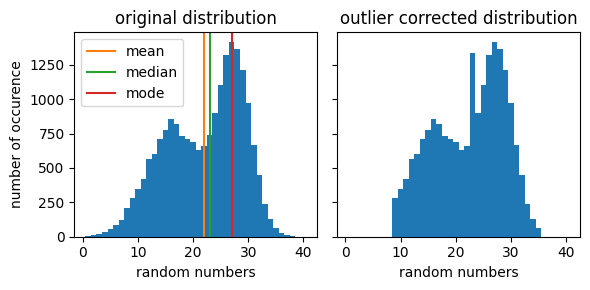

In [9]:
# run cell to visualize both distributions
bins = np.arange(start=0.5, stop=41.5, step=1).tolist()
fig, axs = plt.subplots(ncols=2, figsize=(6, 3), sharey=True, sharex=True)
_ = axs[0].hist(data, bins=bins)
axs[0].set_title("original distribution")
axs[0].set_xlabel("random numbers")
axs[0].set_ylabel("number of occurence")
for val, key, c in zip([data_mean, data_median, data_mode], ["mean", "median", "mode"], ["tab:orange", "tab:green", "tab:red"]):
    axs[0].axvline(val, color=c, label=key)
axs[0].legend()
_ = axs[1].hist(data_corrected, bins=bins)
axs[1].set_title("outlier corrected distribution")
axs[1].set_xlabel("random numbers")
fig.tight_layout()

#### 2. Questionnaire Analysis
In this task, we use a dataset where 38 participants filled out the Positive and Negative Affect Schedule (PANAS) questionnaire before (pre) and after (post) undergoing a study protocol. The PANAS questionnaire is a self-report questionnaire consisting of 20 adjectives (like interested or ashamed) that describe different sensations and feelings. The participants rate all items individually on a 5-point scale indicating how strongly they felt this way. By averaging the scores of 10 of the items, Positive Affect and Negative Affect can be calculated. By averaging the inverted Negative Affect and Positive Affect scores, a Total score over all items can be computed.

stats_sample.csv: 0.00B [00:00, ?B/s]

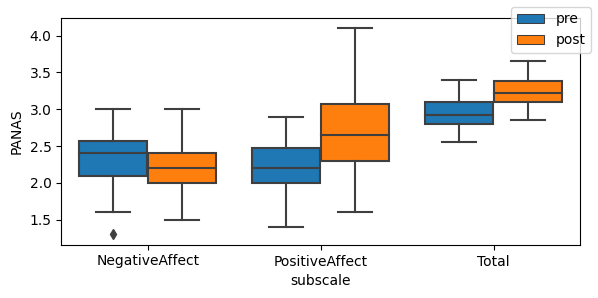

In [10]:
# run cell to load and visualize data
data_panas = bp.example_data.get_stats_example()
fig, ax = plt.subplots(figsize=(6, 3))
bp.plotting.feature_boxplot(data=data_panas, x="subscale", y="PANAS", hue="time", hue_order=["pre", "post"], ax=ax)
fig.tight_layout()

In [11]:
# run cell to visualize the data frame structure
data_analysis = data_panas.reset_index()
data_analysis.head()

,subject,subscale,time,PANAS
0,Vp01,NegativeAffect,post,2.2
1,Vp01,NegativeAffect,pre,2.2
2,Vp01,PositiveAffect,post,2.8
3,Vp01,PositiveAffect,pre,2.4
4,Vp01,Total,post,3.3


##### 2.1 Perform a statistical analysis for the PANAS data stored in ``data_analysis`` to test for differences between group means (differences between pre and post questionnaires separately for all the subscales):
* Follow the guidelines described in the lecture slides or provided by [pingouin](https://pingouin-stats.org/build/html/guidelines.html)
* You should use the ``pingouin`` functions for your analysis
* Store your results in a data frame called ``results_statistics``
    * ``results_statistics`` should have one row for the results of every subscale and all the outputs of the ``pingouin`` function as columns
    * Set the subscales as the indices of ``results_statistics``

**Hint**: The [pingouin guidelines](https://pingouin-stats.org/build/html/guidelines.html) already show the respective *functions* for the statistical tests.

In [120]:
results_statistics = pg.pairwise_tests(data=data_analysis, dv='PANAS', within='subscale', subject='subject', between='time')
results_statistics.set_index('subscale', inplace=True)

results_statistics = results_statistics.loc[["NegativeAffect", "PositiveAffect", "Total"]]

results_statistics

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:478: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = data.groupby([subject, f], as_index=False, observed=True, sort=True).mean()


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
subscale,,,,,,,,,,,
NegativeAffect,subscale * time,post,pre,False,True,-0.951988,74.0,two-sided,3.442022e-01,0.351,-0.216180
PositiveAffect,subscale * time,post,pre,False,True,4.292306,74.0,two-sided,5.285132e-05,389.714,0.974708
Total,subscale * time,post,pre,False,True,6.103860,74.0,two-sided,4.366735e-08,2.43e+05,1.386081


In [121]:
# run tests to check your implementation
assert type(results_statistics) == pd.DataFrame, "Check if results_statistics is of type pandas.DataFrame"
assert results_statistics.shape[0] == 3, "Check if you performed and stored the results for all subscales"
assert list(results_statistics.index) == ["NegativeAffect", "PositiveAffect", "Total"], "Check if you set the indices correctly"
assert results_statistics["Paired"].sum() == 3, "Check your analysis parameters"
assert list(results_statistics["Contrast"])[0] == "time" and list(results_statistics["A"])[0] == "post" and list(results_statistics["B"])[0] == "pre", "Check your analysis parameters"
pval = list(results_statistics["p-unc"])
assert pval[0] < 0.2 and pval[1] < 0.0000006 and pval[2] < 0.000000007, "Check your analysis parameters"

AssertionError: ignored

#### 3. Cortisol Analysis
In this task, we will use data from the same study as in the last assignment, which investigated the capability of the Cold Face Test (CFT) to reduce acute stress. Two groups underwent a similar study protocol, while the Control group performed a resting period and the Intervention group a CFT between study phases. This time we will not look at heart rate data but at cortisol values extracted from saliva samples that have been taken before and after the study phase.

cortisol_sample.csv: 0.00B [00:00, ?B/s]

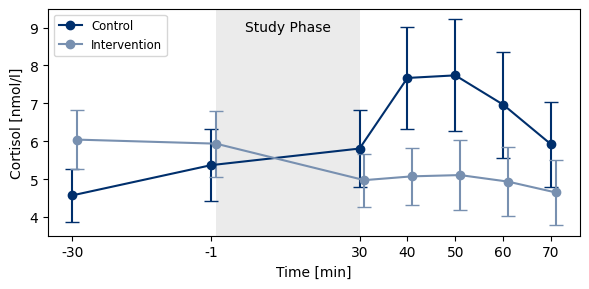

In [122]:
# run cell to load and visualize data
data_cortisol = bp.example_data.get_saliva_example()
sample_times = [-30, -1, 30, 40, 50, 60, 70]
fig, ax = plt.subplots(figsize=(6, 3))
bp.protocols.plotting.saliva_plot(
    data=data_cortisol, saliva_type="cortisol", sample_times=sample_times, test_times=[0, 30], sample_times_absolute=True,
    test_title="Study Phase", ax=ax,
);

In [123]:
# run cell to extract features from cortisol data using BioPsyKit
auc = bp.saliva.auc(
    data_cortisol, saliva_type="cortisol", sample_times=sample_times, compute_auc_post=True, remove_s0=True
)
max_inc = bp.saliva.max_increase(data_cortisol, saliva_type="cortisol", remove_s0=True)
slope = bp.saliva.slope(data_cortisol, sample_idx=[1, 4], sample_times=sample_times, saliva_type="cortisol")

cort_features = pd.concat([auc, max_inc, slope], axis=1)
cort_features = bp.saliva.utils.saliva_feature_wide_to_long(cort_features, saliva_type="cortisol")
data_analysis = cort_features.reset_index()
data_analysis.head()

,condition,subject,saliva_feature,cortisol
0,Control,Vp03,auc_g,870.418075
1,Control,Vp03,auc_i,-72.035925
2,Control,Vp03,auc_i_post,104.057250
3,Control,Vp03,max_inc,0.956000
4,Control,Vp03,slope14,0.013971


##### 3.1 Preparatory Analysis 1: Perform a Normality Check on ``data_analysis`` to test whether our samples come from a normal distribution:
* Use the [pingouin.normality](https://pingouin-stats.org/build/html/generated/pingouin.normality.html) function
* Perform the check for every feature-condition combination
* Store your results in a data frame called ``results_normality``
    * ``results_normality`` should have one row for every feature-condition combination and all the outputs of the pingouin function as columns
    * Set the index of ``results_normality`` to ``saliva_feature`` and ``condition`` (in this order), set the index names accordingly
* Sort the index of ``results_normality`` after performing all the tests

In [143]:
# Check for normality of data_analysis
results_normality = pd.DataFrame()

for feature in data_analysis['saliva_feature'].unique():
    for condition in data_analysis['condition'].unique():
        subset = data_analysis[(data_analysis['saliva_feature'] == feature) & (data_analysis['condition'] == condition)]
        normality_result = pg.normality(subset['cortisol'])
        results_normality = results_normality.append(normality_result)

# Set the index and index names
results_normality.set_index(['saliva_feature', 'condition'], inplace=True)
results_normality.index.names = ['saliva_feature', 'condition']

# Sort the index
results_normality.sort_index(inplace=True)

results_normality


<ipython-input-143-36f027f0e72e>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_normality = results_normality.append(normality_result)
<ipython-input-143-36f027f0e72e>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_normality = results_normality.append(normality_result)
<ipython-input-143-36f027f0e72e>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_normality = results_normality.append(normality_result)
<ipython-input-143-36f027f0e72e>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_normality = results_normality.append(normality_result)
<ipython-input-143-36f027f0e72e>:8: FutureWarning: The frame.app

KeyError: ignored

In [147]:
# run tests to check your implementation
assert type(results_normality) == pd.DataFrame, "Check if results_normality is of type pandas.DataFrame"
assert results_normality.shape[0] == 10, "Check if you performed and stored the results for all condition-saliva feature combinations"
assert list(results_normality.index.names) == ["saliva_feature", "condition"], "Check if you set the names and order of your indices correctly, saliva_feature comes first"
assert list(results_normality.columns) == ["W", "pval", "normal"], "Check if you performed the right analysis"
assert type(results_normality.index) == pd.MultiIndex and list(results_normality.index.names) == ["saliva_feature", "condition"], "Check if you set saliva feature and condition as index"
assert list(results_normality.index.get_level_values(1)) == ["Control", "Intervention"] * 5, "Check if you sorted your index"
assert results_normality["normal"].to_list() == [True, True, False, True, False, True, False, True, False, True], "Check if you set the parameters correctly"

AssertionError: ignored

##### 3.2 Preparatory Analysis 2: Perform a Homoscedasticity Check on ``data_analysis`` to test for the equality of variances:
* Use the [pingouin.homoscedasticity](https://pingouin-stats.org/build/html/generated/pingouin.homoscedasticity.html#pingouin.homoscedasticity) function
* Perform the check for every feature
* Store your results in a data frame called ``results_variance``
    * ``results_variance`` should have one row for every feature and all the outputs of the pingouin function as columns
    * Set the saliva features as the indices of ``results_variance``

In [144]:
# Check for homoscedasticity of data_analysis
results_variance = pd.DataFrame()

for feature in data_analysis['saliva_feature'].unique():
    subset = data_analysis[data_analysis['saliva_feature'] == feature]
    variance_result = pg.homoscedasticity(subset, dv='cortisol', group='condition')
    results_variance = results_variance.append(variance_result)

# Set saliva features as the indices
results_variance.set_index('saliva_feature', inplace=True)

results_variance


<ipython-input-144-5e9c3900dafd>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_variance = results_variance.append(variance_result)
<ipython-input-144-5e9c3900dafd>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_variance = results_variance.append(variance_result)
<ipython-input-144-5e9c3900dafd>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_variance = results_variance.append(variance_result)
<ipython-input-144-5e9c3900dafd>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_variance = results_variance.append(variance_result)
<ipython-input-144-5e9c3900dafd>:7: FutureWarning: The frame.append method i

KeyError: ignored

In [148]:
# run tests to check your implementation
assert type(results_variance) == pd.DataFrame, "Check if results_variance is of type pandas.DataFrame"
assert results_variance.shape[0] == 5, "Check if you performed the test for all 5 saliva features"
assert list(results_variance.columns) == ["W", "pval", "equal_var"], "Check if you performed the right analysis"
assert type(results_variance.index) == pd.Index and list(results_variance.index.names) ==["saliva_feature"], "Check if you set only saliva_feature as index"
assert list(results_variance.index) == ["auc_g", "auc_i", "auc_i_post", "max_inc", "slope14"], "Check if you set the index correctly"
assert list(results_variance["equal_var"]) == [True] * 5, "Check if you set the parameters correctly"

AssertionError: ignored

##### 3.3 Statistical Test: Perform a statistical analysis for the cortisol features stored in ``data_analysis`` to test for differences between group means (differences between conditions separately for all the saliva features):
* Follow the guidelines described in the lecture slides or provided by [pingouin](https://pingouin-stats.org/build/html/guidelines.html)
* You should use the ``pingouin`` functions for your analysis
* Store your results in a data frame called ``results_statistics``
    * ``results_statistics`` should have one row for every saliva feature and all the outputs of the ``pingouin`` function as columns
    * Set the saliva features as the indices of ``results_statistics``

**Hint**: Since we computed features on dependent saliva samples, you should have a look into statistical tests with a *mixed design*.

In [145]:
# Initialize an empty DataFrame to store the results
results_statistics = pd.DataFrame()

# Perform statistical analysis for each saliva feature
for feature in data_analysis['saliva_feature'].unique():
    subset = data_analysis[data_analysis['saliva_feature'] == feature]
    mixed_design_result = pg.mixed_anova(data=subset, dv='cortisol', within='condition', subject='subject')
    results_statistics = results_statistics.append(mixed_design_result)

# Set saliva features as the indices
results_statistics.set_index('saliva_feature', inplace=True)

results_statistics


ValueError: ignored

In [146]:
# run tests to check your implementation
assert type(results_statistics) == pd.DataFrame, "Check if results_statistics is of type pandas.DataFrame"
assert results_statistics.shape[0] == 5, "Check if you performed the test for all the saliva features"
assert results_statistics["Paired"].sum() == 0, "Check your analysis parameters"
assert list(results_statistics["Contrast"])[0] == "condition" and list(results_statistics["A"])[0] == "Control" and list(results_statistics["B"])[0] == "Intervention", "Check your analysis parameters"
assert results_statistics.loc["auc_g", "p-unc"].round(3) == 0.359, "Check if you performed the right type of test"
assert results_statistics.loc["auc_i", "p-unc"].round(3) == 0.06, "Check if you performed the right type of test"
assert results_statistics.loc["auc_i_post", "p-unc"].round(3) == 0.068, "Check if you performed the right type of test"
assert results_statistics.loc["max_inc", "p-unc"].round(3) == 0.04, "Check if you performed the right type of test"
assert results_statistics.loc["slope14", "p-unc"].round(3) == 0.038, "Check if you performed the right type of test"

AssertionError: ignored